In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
from IPython.display import Markdown, display

# Ventas en Supermercados: valores corrientes y constantes y evolución por canal de venta, medio de pago y grupos de artículos
#### Fuente del dataset: https://datos.gob.ar/nl/dataset/sspm-ventas-supermercados
### Este estudio se enfoca en examinar las ventas realizadas en supermercados localizados en Argentina. A través de un análisis explorando la evolución por canal de venta, medio de pago y grupos de artículos, se entiende cómo los consumidores acceden a los productos y cómo sus preferencias han cambiado, influenciadas por factores como la digitalización, la pandemia, el contexto político y las nuevas formas de pago. Este análisis proporcionará insights clave para la toma de decisiones estratégicas, la optimización de la oferta comercial y la mejora de la experiencia de compra.

In [21]:
data = pd.read_csv('ventas-totales-supermercados.csv')
df = pd.DataFrame(data)
df = df.set_index('indice_tiempo')
df.index = pd.to_datetime(df.index)

In [22]:
def detectar_valores_atipicos(df):
    outliers = {}

    for columna in df:
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        umbral_bajo = Q1 - 1.5 * IQR
        umbral_alto = Q3 + 1.5 * IQR
        outliers = df[(df[columna] < umbral_bajo) | (df[columna] > umbral_alto)]

    return outliers

In [23]:
outliers = detectar_valores_atipicos(df)
display(Markdown("## Se utilizó el método intercuartílico para analizar los valores atípicos o 'outliers' dentro de las diferentes categorías del DataFrame:"))
display(outliers)
display(Markdown("## Al enfocarnos en estos valores atípicos, vemos que en casi todas las categorías del DataFrame, las ventas suben considerablemente a partir de 2023."))

## Se utilizó el método intercuartílico para analizar los valores atípicos o 'outliers' dentro de las diferentes categorías del DataFrame:

,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,otros_medios,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
indice_tiempo,,,,,,,,,,,,,,,,,,,,,
2023-10-01,7.083844e+05,26779.197295,7.083844e+08,6.822643e+08,2.612006e+07,7.083844e+08,1.523988e+08,2.405660e+08,2.712979e+08,4.412169e+07,...,1.895953e+08,2.567680e+07,7.221406e+07,7.862748e+07,2.916822e+07,6.867533e+06,9.053687e+07,1.524273e+07,6.030610e+07,4.804091e+07
2023-11-01,7.643048e+05,25210.959841,7.643048e+08,7.356861e+08,2.861873e+07,7.643048e+08,1.600731e+08,2.541494e+08,3.013117e+08,4.877050e+07,...,2.041185e+08,2.802628e+07,7.600781e+07,8.774056e+07,3.372494e+07,7.401603e+06,9.668166e+07,1.486977e+07,5.270428e+07,5.497360e+07
2023-12-01,1.147058e+06,28928.352116,1.147058e+09,1.116025e+09,3.103300e+07,1.147058e+09,2.282199e+08,3.935799e+08,4.507477e+08,7.451017e+07,...,3.072849e+08,4.197133e+07,9.933113e+07,1.393912e+08,4.492928e+07,1.112319e+07,1.415962e+08,2.263538e+07,4.968410e+07,8.831450e+07
2024-01-01,1.101738e+06,22108.256835,1.101738e+09,1.070337e+09,3.140114e+07,1.101738e+09,2.278594e+08,3.526127e+08,4.388585e+08,8.240748e+07,...,2.987466e+08,4.216462e+07,1.120442e+08,1.238909e+08,4.799364e+07,1.033283e+07,1.690985e+08,1.774500e+07,4.544546e+07,7.988320e+07
2024-02-01,1.193012e+06,21301.041272,1.193012e+09,1.159628e+09,3.338443e+07,1.193012e+09,2.418945e+08,3.759408e+08,4.838504e+08,9.132631e+07,...,3.304101e+08,4.821135e+07,1.249112e+08,1.298409e+08,5.208172e+07,1.135862e+07,1.853862e+08,1.765242e+07,4.455452e+07,8.708745e+07
2024-03-01,1.422933e+06,23171.993347,1.422933e+09,1.384251e+09,3.868162e+07,1.422933e+09,2.775458e+08,4.388301e+08,5.927911e+08,1.137659e+08,...,4.216108e+08,5.837004e+07,1.553741e+08,1.528342e+08,5.973739e+07,1.324709e+07,2.192726e+08,1.890130e+07,5.268233e+07,9.424957e+07
2024-04-01,1.335118e+06,20588.467376,1.335118e+09,1.294639e+09,4.047884e+07,1.335118e+09,2.330190e+08,4.103313e+08,5.826084e+08,1.091595e+08,...,3.917619e+08,5.441253e+07,1.574919e+08,1.497441e+08,5.933288e+07,1.271647e+07,2.002970e+08,2.514833e+07,5.197224e+07,8.442240e+07
2024-05-01,1.412880e+06,21018.597961,1.412880e+09,1.361031e+09,5.184859e+07,1.412880e+09,2.435979e+08,4.255299e+08,6.227757e+08,1.209763e+08,...,4.235807e+08,5.894462e+07,1.699988e+08,1.538855e+08,6.057147e+07,1.355402e+07,2.074317e+08,3.425556e+07,6.492758e+07,8.560995e+07
2024-06-01,1.532919e+06,22165.780267,1.532919e+09,1.488531e+09,4.438842e+07,1.532919e+09,2.649578e+08,4.650090e+08,6.700532e+08,1.328994e+08,...,4.406453e+08,6.361171e+07,1.817737e+08,1.663499e+08,6.611533e+07,1.517610e+07,2.206922e+08,4.174498e+07,7.295877e+07,1.000675e+08


## Al enfocarnos en estos valores atípicos, vemos que en casi todas las categorías del DataFrame, las ventas suben considerablemente a partir de 2023.

## "Melted Dataframe" para separar los productos en una categoría aparte:

In [24]:
df_reset = df.reset_index()

df_melted_productos = pd.melt(df_reset,
                              id_vars = ['indice_tiempo'], 
                              value_vars = ['ventas_totales_grupo_articulos',
                                            'subtotal_ventas_alimentos_bebidas', 'bebidas', 'almacen', 'panaderia',
                                            'lacteos', 'carnes', 'verduleria_fruteria',
                                            'alimentos_preparados_rotiseria', 'articulos_limpieza_perfumeria',
                                            'indumentaria_calzado_textiles_hogar', 'electronicos_articulos_hogar',
                                            'otros'], 
                              var_name = 'producto', 
                              value_name = 'cantidad vendida')

df_melted_productos = df_melted_productos.sort_values(by = 'cantidad vendida', ascending = False)

## Al visualizar las ventas de productos a precios corrientes (valor nominal), se confirma que el principal factor de la repentina subida en las ventas a partir de 2023 es la deflación. En cambio, al ver el progreso en las ventas por un valor real o constante, la línea se mantiene prácticamente siempre al mismo nivel.

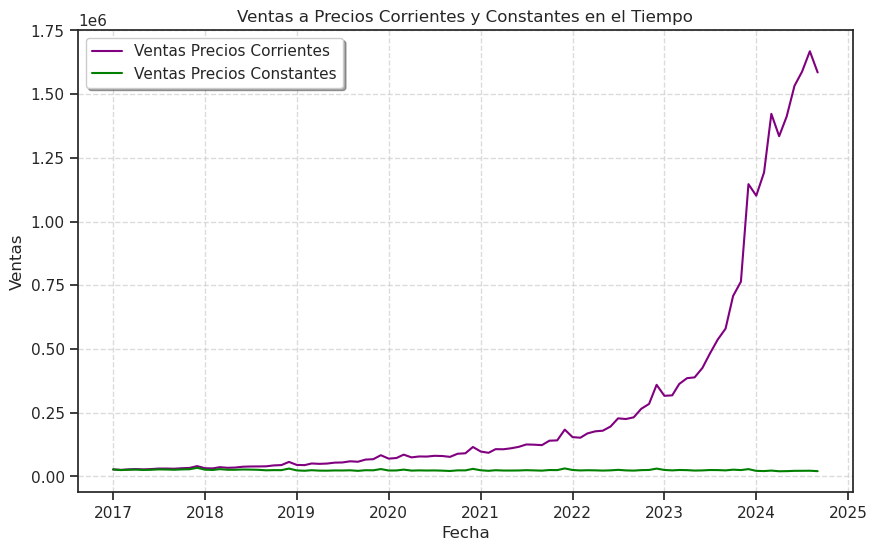

In [25]:
plt.figure(figsize = (10, 6))
sns.lineplot(x = df.index, y = 'ventas_precios_corrientes', data = df, color = 'purple', label = 'Ventas Precios Corrientes')
sns.lineplot(x = df.index, y = 'ventas_precios_constantes', data = df, color = 'green', label = 'Ventas Precios Constantes')
plt.title('Ventas a Precios Corrientes y Constantes en el Tiempo')
plt.ylabel('Ventas')
plt.xlabel('Fecha')
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.legend(loc = 'best', shadow = True)
display(Markdown("""## Al visualizar las ventas de productos a precios corrientes (valor nominal), se confirma que el principal factor de la repentina subida en las ventas a partir de 2023 es la deflación. En cambio, al ver el progreso en las ventas por un valor real o constante, la línea se mantiene prácticamente siempre al mismo nivel."""))
plt.show()

## Análisis categórico de productos: Los productos más vendidos son el subgrupo total de bebidas y alimentos, y los productos de almacén; los productos menos vendidos son los alimentos preparados tipo rotisería, indumentaria, y textiles para el hogar. Esto se mantiene así durante prácticamente la totalidad del período; la venta total de los diferentes productos aumenta de forma paralela.

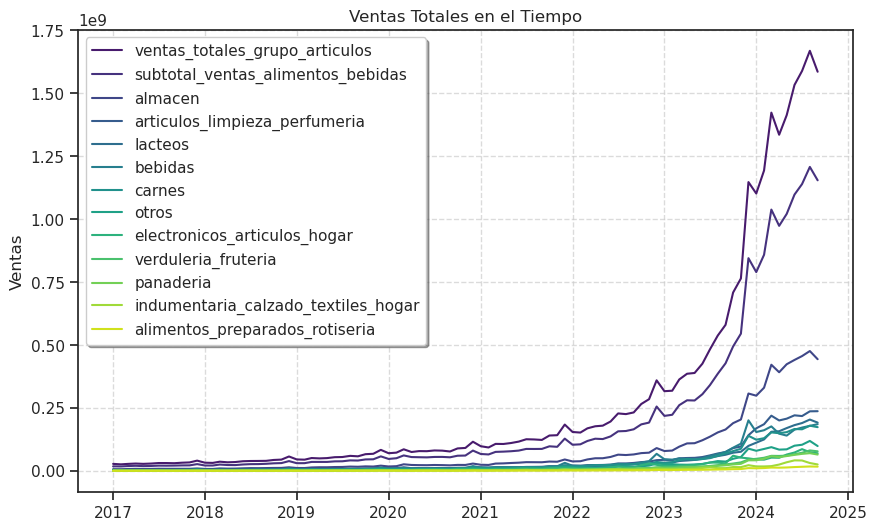

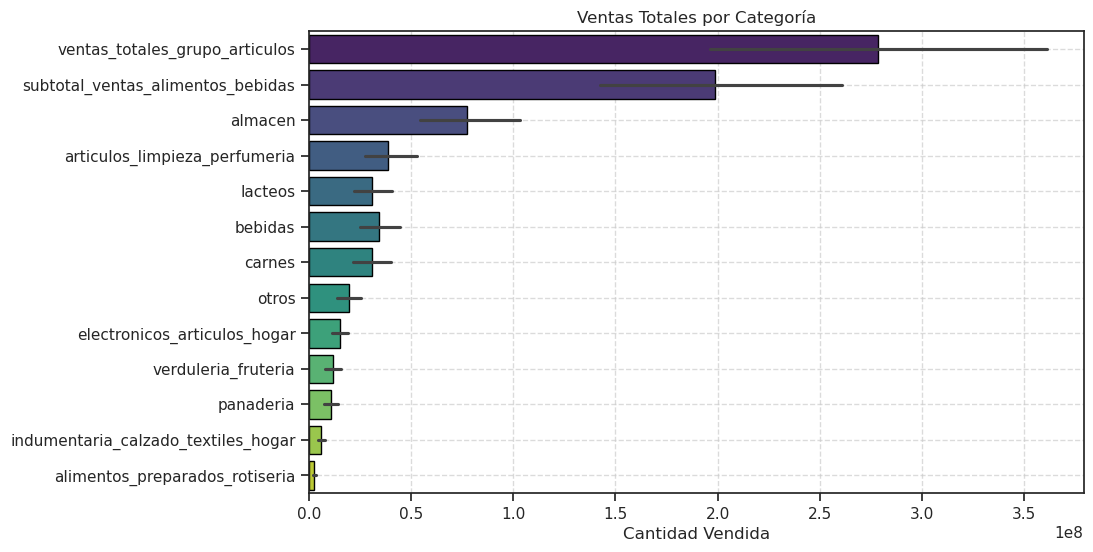

In [26]:
display(Markdown("## Análisis categórico de productos: Los productos más vendidos son el subgrupo total de bebidas y alimentos, y los productos de almacén; los productos menos vendidos son los alimentos preparados tipo rotisería, indumentaria, y textiles para el hogar. Esto se mantiene así durante prácticamente la totalidad del período; la venta total de los diferentes productos aumenta de forma paralela."))

# Ventas totales por tiempo:
plt.figure(figsize = (10, 6))
sns.lineplot(x = 'indice_tiempo', y = 'cantidad vendida', data = df_melted_productos, hue = 'producto', palette = 'viridis')
plt.title('Ventas Totales en el Tiempo')
plt.ylabel('Ventas')
plt.xlabel('')
plt.legend(loc = 'best', shadow = True)
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.show()

# Ventas totales por categoría:
plt.figure(figsize = (10, 6))
ax_1 = sns.barplot(df_melted_productos, x = 'cantidad vendida', y = 'producto', hue = 'producto', legend = False, palette = 'viridis', edgecolor = "black")
ax_1.set_axisbelow(True)
plt.title('Ventas Totales por Categoría')
plt.xlabel('Cantidad Vendida')
plt.ylabel('')
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.show()

## Si vemos más en detalle los años 2023 y 2024, las ventas comienzan a subir mucho a partir de noviembre de 2023. En 2024, las ventas continúan creciendo en forma acelerada a causa de la constante caída de la inflación y del progresivo crecimiento económico, generando un congelamiento en los precios y en muchos casos, una bajada de precios:

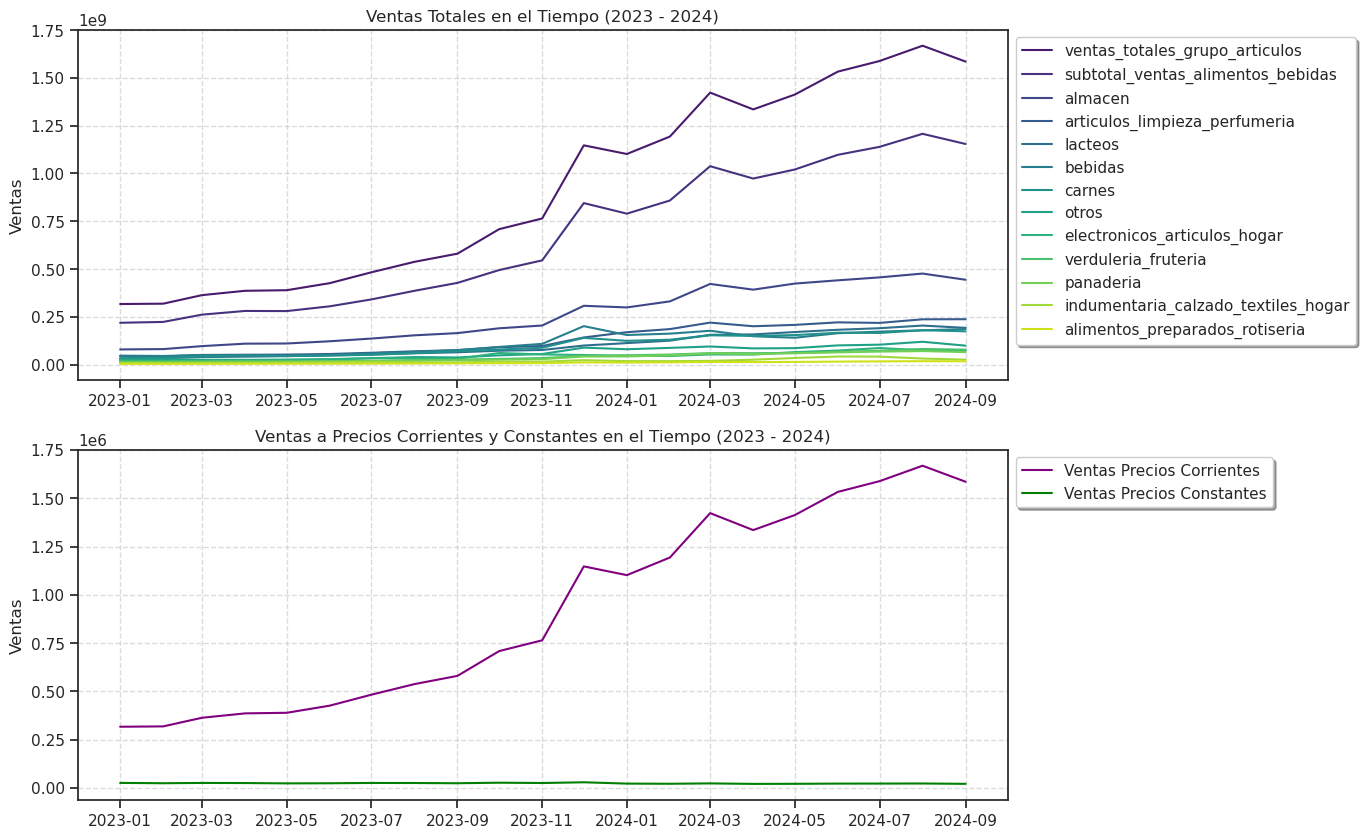

In [27]:
df_2023_2024 = df[df.index.year.isin([2023, 2024])]
df_temp = df_melted_productos.copy().set_index('indice_tiempo')
df_2023_2024_productos = df_temp[df_temp.index.year.isin([2023, 2024])]

plt.figure(figsize = (12, 10))

plt.subplot(2, 1, 1)
sns.lineplot(x = 'indice_tiempo', y = 'cantidad vendida', data = df_2023_2024_productos, hue = 'producto', palette = 'viridis')
plt.title('Ventas Totales en el Tiempo (2023 - 2024)')
plt.xlabel('')
plt.ylabel('Ventas')
plt.legend(loc = 'best', shadow = True, bbox_to_anchor=(1, 1))
plt.grid(True, linestyle = '--', alpha = 0.7)

plt.subplot(2, 1, 2)
sns.lineplot(x = df_2023_2024.index, y = 'ventas_precios_corrientes', data = df_2023_2024, color = 'purple', label = 'Ventas Precios Corrientes')
sns.lineplot(x = df_2023_2024.index, y = 'ventas_precios_constantes', data = df_2023_2024, color = 'green', label = 'Ventas Precios Constantes')
plt.title('Ventas a Precios Corrientes y Constantes en el Tiempo (2023 - 2024)')
plt.xlabel('')
plt.ylabel('Ventas')
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.legend(loc = 'best', shadow = True, bbox_to_anchor=(1, 1))

display(Markdown("## Si vemos más en detalle los años 2023 y 2024, las ventas comienzan a subir mucho a partir de noviembre de 2023. En 2024, las ventas continúan creciendo en forma acelerada a causa de la constante caída de la inflación y del progresivo crecimiento económico, generando un congelamiento en los precios y en muchos casos, una bajada de precios:"))

plt.show()

## Al analizar las gráficas temporales, concluímos que el producto con mayor cantidad de ventas es el total en alimentos y bebidas. De la misma forma, es el producto que mayor crecimiento en ventas tuvo entre noviembre de 2023 y septiembre 2024; esto es así porque son los productos que mayor reducción inflacionaria tuvieron durante 2024.

## Al categorizar las ventas por canal de ventas, casi la totalidad de las compras fueron realizadas en el salón de ventas, mientras que un porcentaje muy bajo se realizó de forma online:

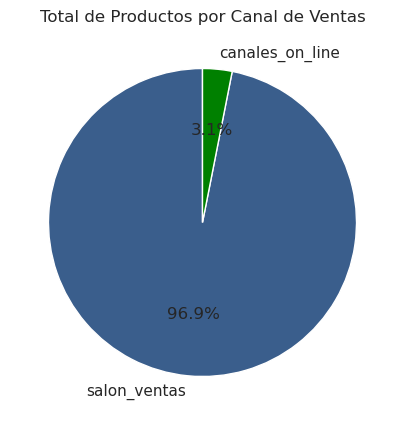

In [28]:
canal_ventas = df.groupby(df.index).agg({
    'salon_ventas': 'sum',
    'canales_on_line': 'sum'
})

total_canal_ventas = canal_ventas.sum()

plt.figure(figsize = (5, 5))
plt.pie(total_canal_ventas, labels = total_canal_ventas.index, autopct='%1.1f%%', startangle = 90, colors = ['#3a5e8cFF', 'green'])
plt.title('Total de Productos por Canal de Ventas')

display(Markdown("## Al categorizar las ventas por canal de ventas, casi la totalidad de las compras fueron realizadas en el salón de ventas, mientras que un porcentaje muy bajo se realizó de forma online:"))

plt.show()

In [29]:
df_melted_medio_pago = pd.melt(df_reset,
                              id_vars = ['indice_tiempo'], 
                              value_vars = ['efectivo', 'tarjetas_debito', 'tarjetas_credito', 'otros_medios'], 
                              var_name = 'medio de pago', 
                              value_name = 'cantidad vendida')

df_melted_medio_pago = df_melted_medio_pago.sort_values(by = 'cantidad vendida', ascending = False)

## A continuación analizamos los medios de pago por categoría:

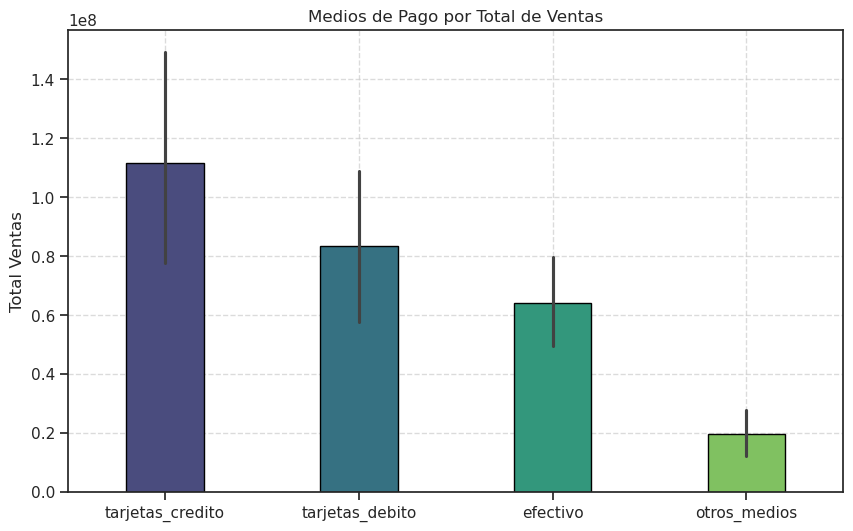

In [30]:
plt.figure(figsize = (10, 6))
sns.set(style="ticks")

ax_2 = sns.barplot(x = 'medio de pago', y = 'cantidad vendida', data = df_melted_medio_pago, hue = 'medio de pago', 
                   palette = 'viridis', width = 0.4, edgecolor = "black")

ax_2.set_axisbelow(True)
plt.title('Medios de Pago por Total de Ventas')
plt.xlabel('')
plt.ylabel('Total Ventas')
plt.grid(True, linestyle = '--', alpha = 0.7)

display(Markdown("## A continuación analizamos los medios de pago por categoría:"))

plt.show()

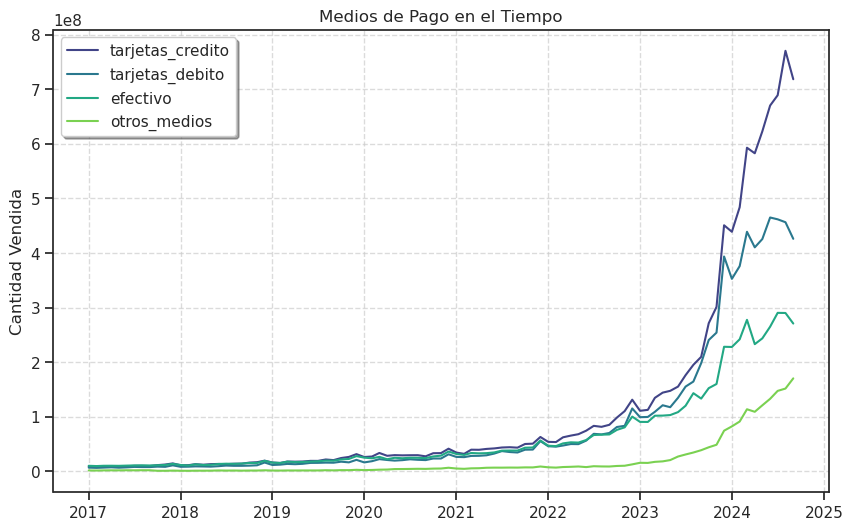

In [31]:
plt.figure(figsize = (10, 6))
sns.lineplot(x = 'indice_tiempo', y = 'cantidad vendida', data = df_melted_medio_pago, hue = 'medio de pago', palette = 'viridis')
plt.title('Medios de Pago en el Tiempo')
plt.xlabel('')
plt.ylabel('Cantidad Vendida')
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.legend(loc = 'best', shadow = True)
plt.show()

## Este orden en los medios de pago se mantiene, excepto para las tarjetas de débito. Podemos observar que los pagos en efectivo son más frecuentes que las tarjetas de débito desde 2017 hasta mediados de 2022, donde esto cambia y las tarjetas de débito se comienzan a utilizar más que el efectivo. Esto es por diversos factores:
* ## Entre 2022 y 2023, el país enfrentó una de las inflaciones más altas, provocando una disminución del valor del peso argentino.
* ## Durante ese período se promovieron beneficios fiscales para comercios que aceptaran pagos con tarjeta de débito.
* ## Programas como "Ahora 12": Aunque originalmente enfocado a tarjetas de crédito, algunos programas comenzaron a incluir tarjetas de débito.
* ## La pandemia del COVID-19 fomentó el uso de pagos digitales y sin contacto.

## En el siguiente gráfico se presenta más en detalle el cambio entre las ventas en efectivo y las ventas con tarjeta de débito. Sucede precisamente en junio del 2022:

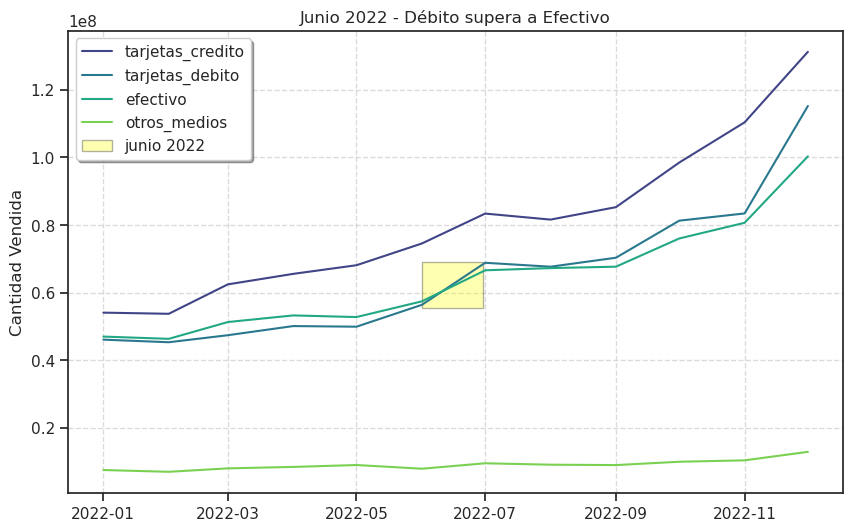

In [32]:
df_temp_medio = df_melted_medio_pago.copy().set_index('indice_tiempo')
df_2022_medio_pago = df_temp_medio[df_temp_medio.index.year.isin([2022])]

plt.figure(figsize = (10, 6))
sns.lineplot(x = df_2022_medio_pago.index, y = 'cantidad vendida', data = df_2022_medio_pago, hue = 'medio de pago', palette = 'viridis')
plt.title('Junio 2022 - Débito supera a Efectivo')
plt.xlabel('')
plt.ylabel('Cantidad Vendida')

inicio_junio = pd.Timestamp('2022-06-01')
fin_junio = pd.Timestamp('2022-06-30')
plt.axvspan(inicio_junio, fin_junio, facecolor = 'yellow', edgecolor = 'black', alpha = 0.3, label = 'junio 2022', ymin = 0.4, ymax = 0.5)

plt.grid(True, linestyle = '--', alpha = 0.7)
plt.legend(loc = 'best', shadow = True)

display(Markdown("## En el siguiente gráfico se presenta más en detalle el cambio entre las ventas en efectivo y las ventas con tarjeta de débito. Sucede precisamente en junio del 2022:"))

plt.show()

# Conclusiones
### Desde 2017, las ventas en productos de supermercados aumentan de forma muy leve y progresiva (prácticamente se mantienen estables). El primer gran cambio sucede entre 2020 y 2022 con la llegada de la pandemia mundial del COVID-19, y de una cuarentena que provocó un sentimiento de miedo e incertidumbre en la gente; esto fue generando un aumento aún más elevado en las ventas de los bienes escenciales, como los artículos de almacén, alimentos, bebidas, productos de limpieza e higiene, etc.